<center> <h1> Exploratory Data Analysis </h1> </center>

This analysis focuses on Riyadh real estate listings extracted from [Aqar.fm](https://aqar.fm/) website: <span style="font-family: 'Arial', sans-serif;">'https://aqar.fm'</span>.By examining price trends, market segmentation, and competitive analysis, we aim to uncover insights specifically tailored for successful property sales. The dataset includes key variables such as price, property type, location, area, amenities, and more.

**1. Data Loading and Initial Exploration:**

In [9]:
# Loading the selected dataset Riyadh_Aqar.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Riyadh_Aqar.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/Project/Riyadh_Aqar.csv'

Summary of the dimensions (number of rows and columns) of Riyadh Aqar Dataset

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.shape

Number of rows: 158532
Number of columns: 21


(158532, 21)

Provides summary statistics (count, mean, standard deviation, min, max, quartiles) for the numerical columns in  Riyadh Aqar Dataset.

In [ ]:
df.describe()

,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,ketchen,furnished,location.lat,location.lng,width,length,price_per_sqm,price_per_area
count,1.585320e+05,158532.000000,148070.000000,148115.000000,148115.000000,158527.000000,156317.000000,158532.000000,158209.000000,141585.000000,158532.000000,158532.000000,158532.000000,146127.000000,146074.000000,1.585270e+05,1.585270e+05
mean,2.915107e+06,4.428090,4.557912,2.184634,4.296574,409.899796,20.712207,3.739863,3.063802,0.963407,0.074528,24.719630,46.671036,23.875232,49.028513,6.713645e+03,6.713645e+03
std,1.030913e+07,3.803443,1.170488,1.088319,0.963116,1902.283206,8.966049,7.962756,1.963422,0.187761,0.262628,0.131865,0.099185,379.264697,423.087822,2.169677e+04,2.169677e+04
min,1.000000e+00,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,24.285342,46.187290,1.000000,1.000000,2.000000e-03,2.000000e-03
25%,1.050000e+06,3.000000,4.000000,1.000000,4.000000,241.000000,15.000000,0.000000,1.000000,1.000000,0.000000,24.578390,46.600597,11.000000,18.000000,4.009662e+03,4.009662e+03
50%,1.700000e+06,3.000000,5.000000,2.000000,5.000000,300.000000,20.000000,0.000000,3.000000,1.000000,0.000000,24.761888,46.661610,14.000000,24.000000,5.666667e+03,5.666667e+03
75%,2.950000e+06,3.000000,5.000000,3.000000,5.000000,412.000000,20.000000,3.000000,4.000000,1.000000,0.000000,24.828700,46.759819,20.000000,30.000000,8.163265e+03,8.163265e+03
max,1.800000e+09,22.000000,7.000000,7.000000,5.000000,700000.000000,100.000000,36.000000,10.000000,1.000000,1.000000,25.187447,47.373414,140625.000000,140625.000000,3.500000e+06,3.500000e+06


df.head() Displays the first 5 rows. While df.tail() Displays the last 5 rows

In [ ]:
df.head()

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,...,furnished,location.lat,location.lng,city,district,width,length,createdAt,price_per_sqm,price_per_area
7,عمارة للبيع,11000000,7,NaN,NaN,NaN,1050.0,60.0,7,6.0,...,0,24.819653,46.595070,الرياض,حي القيروان,30.0,35.0,1/1/2023 16:28,10476.190476,10476.190476
8,فيلا للبيع,5000000,3,5.0,2.0,5.0,394.0,15.0,10,1.0,...,0,24.800910,46.609243,الرياض,حي الملقا,13.0,30.0,1/1/2023 16:28,12690.355330,12690.355330
9,فيلا للبيع,1850000,3,6.0,2.0,5.0,330.0,20.0,0,2.0,...,0,24.669754,46.550041,الرياض,حي المهدية,12.0,27.0,1/1/2023 16:28,5606.060606,5606.060606
10,فيلا للبيع,2350000,3,4.0,3.0,4.0,225.0,20.0,0,3.0,...,0,24.857486,46.671509,الرياض,حي النرجس,1.0,225.0,1/1/2023 16:28,10444.444444,10444.444444
13,عمارة للبيع,6000000,7,NaN,NaN,NaN,867.0,36.0,30,3.0,...,0,24.746378,46.668077,الرياض,حي الملك فهد,25.0,35.0,1/1/2023 16:28,6920.415225,6920.415225


In [ ]:
df.tail()

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,...,furnished,location.lat,location.lng,city,district,width,length,createdAt,price_per_sqm,price_per_area
353598,فيلا للبيع,5800000,3,5.0,2.0,5.0,403.0,20.0,0,1.0,...,0,24.727747,46.602581,الرياض,حي النخيل,15.0,26.0,8/4/2023 21:04,14392.059553,14392.059553
353606,فيلا للبيع,7000000,3,6.0,2.0,5.0,700.0,15.0,17,4.0,...,0,24.787712,46.751518,الرياض,حي غرناطة,20.0,35.0,8/4/2023 21:04,10000.000000,10000.000000
353607,فيلا للبيع,2800000,3,7.0,2.0,5.0,400.0,20.0,10,1.0,...,1,24.636583,46.617821,الرياض,حي لبن,20.0,20.0,8/4/2023 21:04,7000.000000,7000.000000
353613,فيلا للبيع,650000,3,7.0,3.0,5.0,245.0,NaN,0,1.0,...,0,24.602110,46.712650,الرياض,حي اليمامة,9.0,27.0,8/4/2023 21:17,2653.061224,2653.061224
353614,فيلا للبيع,2500000,3,5.0,3.0,5.0,258.0,15.0,0,1.0,...,0,24.885909,46.656400,الرياض,حي النرجس,12.0,22.0,8/4/2023 21:17,9689.922481,9689.922481


**2. Data Cleaning:**

Randomly selects 25 rows from your DataFrame (df) and returns a new DataFrame containing only those selected rows.

In [ ]:
df.sample(n=25)

,title.1,price,category,beds,livings,wc,area,type,street_width,age,...,ketchen,ac,furnished,location.lat,location.lng,city,district,width,length,createdAt
258238,مكتب تجاري للإيجار في شارع السيل الكبير,8000,14,NaN,NaN,NaN,70.0,NaN,40.0,1.0,...,NaN,NaN,1.0,24.659138,46.518696,الرياض,حي المهدية,5.0,14.0,4/1/2023 2:58
279893,شقة للإيجار في شارع عبدالله بن رواحة,33000,1,3.0,1.0,2.0,152.0,NaN,20.0,0.0,...,1.0,1.0,0.0,24.711535,46.697562,الرياض,حي السليمانية,NaN,NaN,5/3/2023 4:04
154035,فيلا للبيع في شارع نبرة,1800000,3,5.0,1.0,3.0,375.0,NaN,15.0,5.0,...,1.0,NaN,0.0,24.770639,46.834446,الرياض,حي النهضة,13.0,28.0,1/1/2023 18:36
84449,فيلا للبيع في شارع السيل الكبير,1399000,3,4.0,3.0,5.0,205.0,NaN,20.0,0.0,...,1.0,NaN,0.0,24.671177,46.553566,الرياض,حي المهدية,9.0,22.0,1/1/2023 17:31
276094,شقة للإيجار في شارع سعود بن محمد بن رشود,1650,1,1.0,0.0,1.0,400.0,NaN,20.0,5.0,...,1.0,1.0,0.0,24.870192,46.843037,الرياض,حي الرمال,20.0,20.0,5/3/2023 3:52
218772,فيلا للبيع في شارع رقم 399,3300000,3,3.0,1.0,2.0,405.0,NaN,15.0,0.0,...,1.0,NaN,0.0,24.839874,46.776959,الرياض,حي المونسية,20.0,20.0,3/2/2023 22:45
261709,أرض للإيجار في شارع علي بن شيبان,135000,15,NaN,NaN,NaN,900.0,3.0,40.0,NaN,...,NaN,NaN,NaN,24.560075,46.589661,الرياض,حي ظهرة نمار,30.0,30.0,4/1/2023 3:25
208481,فيلا للبيع في طريق الملك عبدالله,2100000,3,5.0,5.0,5.0,250.0,NaN,20.0,0.0,...,1.0,NaN,0.0,24.777443,46.778019,الرياض,حي اشبيلية,12.0,20.0,3/2/2023 22:13
239153,أرض للبيع في شارع عبدالعزيز آل عليان,14023800,2,NaN,NaN,NaN,3339.0,1.0,12.0,NaN,...,NaN,NaN,NaN,24.714935,46.790482,الرياض,حي الريان,63.0,53.0,4/1/2023 1:39
230510,شقة للبيع في شارع احمد بن الخطاب,680000,6,3.0,2.0,4.0,147.0,NaN,25.0,0.0,...,1.0,NaN,0.0,24.561677,46.535005,الرياض,حي طويق,11.0,11.0,4/1/2023 1:24




Renames the columns 'title.1' to 'AqarKind' and 'wc' to 'Bathroom', improving clarity within your DataFrame.Also removes the columns 'ac' and 'type' from your DataFrame, likely because they are not relevant to analysis

In [ ]:
df = df.rename(columns={'title.1': 'AqarKind',
                        'wc' : 'Bathroom',
                       })
# no need reqading my analysis
df = df.drop(['ac','type'], axis=1)

df.dtypes

AqarKind             object
price                 int64
category              int64
beds                float64
livings             float64
Bathroom            float64
area                float64
street_width        float64
age                 float64
street_direction    float64
ketchen             float64
furnished           float64
location.lat        float64
location.lng        float64
city                 object
district             object
width               float64
length              float64
createdAt            object
dtype: object

In [ ]:

df.isnull()

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,...,furnished,location.lat,location.lng,city,district,width,length,createdAt,price_per_sqm,price_per_area
7,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
353606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
353607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
353613,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Isolate rows where the 'furnished' and 'age' columns have missing values. Then replace missing values (NaN) in the 'furnished' and 'age' columns with the value '0' with changing coloumns from float to int.

In [ ]:
# Shows rows with NaN in 'furnished'
df[df['furnished'].isnull()]
df['furnished'].fillna(0, inplace=True)
# Shows rows with NaN in
df[df['age'].isnull()]
df['age'].fillna(0, inplace=True)
# Change data type
df['furnished'] = df['furnished'].astype(int)
df['age'] = df['age'].astype(int)

In [ ]:
df

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,ketchen,furnished,location.lat,location.lng,city,district,width,length,createdAt
0,أرض للبيع في حي الشرق,555000,2,NaN,NaN,NaN,300.0,18.0,0,3.0,NaN,0,24.907362,46.911190,الرياض,حي الشرق,12.0,25.0,1/1/2023 16:28
1,أرض للبيع في شارع سليمان بن عبدالله الجبرين,2000000,2,NaN,NaN,NaN,400.0,15.0,0,3.0,NaN,0,24.875885,46.662893,الرياض,حي النرجس,25.0,16.0,1/1/2023 16:28
2,أرض للبيع في شارع عبدالرحمن بن أبي ياسر,1500000,2,NaN,NaN,NaN,600.0,18.0,0,4.0,NaN,0,24.920311,46.815323,الرياض,حي الرمال,20.0,30.0,1/1/2023 16:28
3,شقة للإيجار في حي الرمال,2800,1,1.0,1.0,1.0,80.0,36.0,0,NaN,1.0,0,24.834438,46.800172,الرياض,حي الرمال,10.0,8.0,1/1/2023 16:28
4,أرض للبيع في شارع عقرباء 111,2000000,2,NaN,NaN,NaN,835.0,15.0,0,5.0,NaN,0,24.907408,46.440437,الرياض,حي القيروان,19.0,43.0,1/1/2023 16:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353611,أرض للبيع في شارع ابن نشوان,4500000,2,NaN,NaN,NaN,750.0,15.0,0,4.0,NaN,0,24.692915,46.587647,الرياض,حي عرقة,25.0,30.0,8/4/2023 21:04
353612,أرض للبيع في شارع العمره,2200,2,NaN,NaN,NaN,999.0,NaN,0,2.0,NaN,0,24.845312,46.878513,الرياض,حي الجنادرية,NaN,NaN,8/4/2023 21:14
353613,فيلا للبيع في شارع وادي طواء,650000,3,7.0,3.0,5.0,245.0,NaN,0,1.0,1.0,0,24.602110,46.712650,الرياض,حي اليمامة,9.0,27.0,8/4/2023 21:17
353614,فيلا للبيع في حي النرجس,2500000,3,5.0,3.0,5.0,258.0,15.0,0,1.0,1.0,0,24.885909,46.656400,الرياض,حي النرجس,12.0,22.0,8/4/2023 21:17


This line groups your DataFrame (df) based on the unique values in the 'category' column. Each group will represent all rows that share the same category.
The .size() function calculates the count (or size) of each group within the grouped DataFrame.

In [ ]:
grouped_data = df.groupby('category')
grouped_data.size()

category
1      46844
2     113332
3     120237
4       7154
5       9920
6      21113
7      10297
8       3251
9        688
10      1568
11       108
12       171
13      1907
14      2043
15      2248
16      1421
17       872
18       220
19      1752
20       861
21      1004
22      6197
23       408
dtype: int64

This code provided creates a dictionary that maps category numbers to AqarKind values. It then uses this dictionary to fill the AqarKind column in the DataFrame with the corresponding values based on the Category column.

In [ ]:
# Create a dictionary mapping category numbers to AqarKind values
category_to_aqarkind = {
    1: "شقة للإيجار",
    2: "أرض للبيع",
    3: "فيلا للبيع",
    4: "دور للإيجار",
    5: "فيلا للإيجار",
    6: "شقة للبيع",
    7: "عمارة للبيع",
    8: "محل للإيجار",
    9: "بيت للبيع",
    10: "استراحة للبيع",
    11: "بيت للإيجار",
    12: "مزرعة للبيع",
    13: "استراحة للإيجار",
    14: "مكتب تجاري",
    15: "أرض للإيجار",
    16: "عمارة للإيجار",
    17: "مستودع للإيجار",
    18: "مخيم للإيجار",
    19: "غرفة للإيجار",
    20: "محل للبيع",
    21: "شقة مفروشة",
    22: "دور للبيع",
    23: "شاليه للإيجار",
}

# Fill the AqarKind column with the corresponding values based on the Category column
df['AqarKind'] = df['category'].apply(lambda x: category_to_aqarkind[x])

# Check the results
df

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,...,furnished,location.lat,location.lng,city,district,width,length,createdAt,price_per_sqm,price_per_area
7,عمارة للبيع,11000000,7,NaN,NaN,NaN,1050.0,60.0,7,6.0,...,0,24.819653,46.595070,الرياض,حي القيروان,30.0,35.0,1/1/2023 16:28,10476.190476,10476.190476
8,فيلا للبيع,5000000,3,5.0,2.0,5.0,394.0,15.0,10,1.0,...,0,24.800910,46.609243,الرياض,حي الملقا,13.0,30.0,1/1/2023 16:28,12690.355330,12690.355330
9,فيلا للبيع,1850000,3,6.0,2.0,5.0,330.0,20.0,0,2.0,...,0,24.669754,46.550041,الرياض,حي المهدية,12.0,27.0,1/1/2023 16:28,5606.060606,5606.060606
10,فيلا للبيع,2350000,3,4.0,3.0,4.0,225.0,20.0,0,3.0,...,0,24.857486,46.671509,الرياض,حي النرجس,1.0,225.0,1/1/2023 16:28,10444.444444,10444.444444
13,عمارة للبيع,6000000,7,NaN,NaN,NaN,867.0,36.0,30,3.0,...,0,24.746378,46.668077,الرياض,حي الملك فهد,25.0,35.0,1/1/2023 16:28,6920.415225,6920.415225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353598,فيلا للبيع,5800000,3,5.0,2.0,5.0,403.0,20.0,0,1.0,...,0,24.727747,46.602581,الرياض,حي النخيل,15.0,26.0,8/4/2023 21:04,14392.059553,14392.059553
353606,فيلا للبيع,7000000,3,6.0,2.0,5.0,700.0,15.0,17,4.0,...,0,24.787712,46.751518,الرياض,حي غرناطة,20.0,35.0,8/4/2023 21:04,10000.000000,10000.000000
353607,فيلا للبيع,2800000,3,7.0,2.0,5.0,400.0,20.0,10,1.0,...,1,24.636583,46.617821,الرياض,حي لبن,20.0,20.0,8/4/2023 21:04,7000.000000,7000.000000
353613,فيلا للبيع,650000,3,7.0,3.0,5.0,245.0,NaN,0,1.0,...,0,24.602110,46.712650,الرياض,حي اليمامة,9.0,27.0,8/4/2023 21:17,2653.061224,2653.061224


This line of code uses the isin() method to filter the DataFrame to keep only rows where the AqarKind value is not in the list. The isin() method takes a list as an argument and returns a Boolean Series where True indicates that the value is in the list and False indicates that the value is not in the list. The ~ operator inverts the Boolean Series, so that True becomes False and False becomes True. This means that the df[~df['AqarKind'].isin(unwanted_aqarkinds)] expression returns a DataFrame that contains only rows where the AqarKind value is not in the list.

In [ ]:
# Unwanted categories - Create a list
unwanted_aqarkinds = [
    "شقة للإيجار",
    "أرض للبيع",
    "دور للإيجار",
    "فيلا للإيجار",
    "محل للإيجار",
    "استراحة للبيع",
    "بيت للإيجار",
    "مزرعة للبيع",
    "استراحة للإيجار",
    "مكتب تجاري",
    "أرض للإيجار",
    "عمارة للإيجار",
    "مستودع للإيجار",
    "مخيم للإيجار",
    "غرفة للإيجار",
    "محل للبيع",
    "شاليه للإيجار",
    "شقة مفروشة"
]

# Filter the DataFrame (keeping only rows NOT in the unwanted list)
df = df[~df['AqarKind'].isin(unwanted_aqarkinds)]


**3. Exploratory Data Analysis:**

Calculates and displays the frequency of each unique 'AqarKind' within every 'category' present in your DataFrame.

In [ ]:
grouped_data = df.groupby('category')['AqarKind'].value_counts()
grouped_data


category  AqarKind   
3         فيلا للبيع     120237
6         شقة للبيع       21113
7         عمارة للبيع     10297
9         بيت للبيع         688
22        دور للبيع        6197
Name: count, dtype: int64

Creates a heatmap that visualizes the distribution of different 'AqarKind' within each 'category'

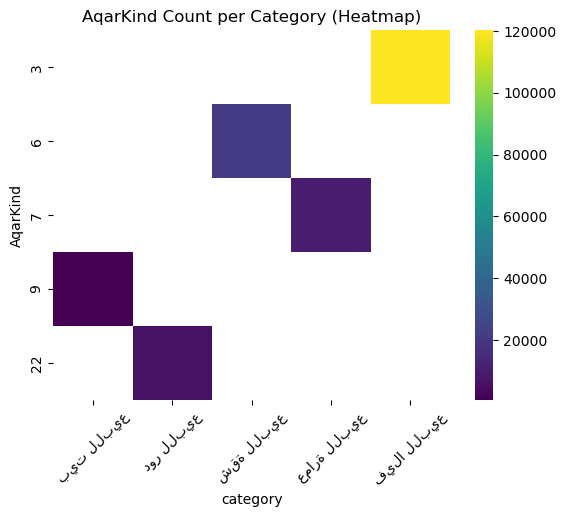

In [ ]:
pivot_table = grouped_data.unstack()
sns.heatmap(pivot_table, cmap='viridis')
plt.xlabel('category')
plt.ylabel('AqarKind')
plt.title('AqarKind Count per Category (Heatmap)')
plt.xticks(rotation=45)
plt.show()

Generates a horizontal bar chart that shows the top 10 most expensive districts in your dataset, ranked by average property price

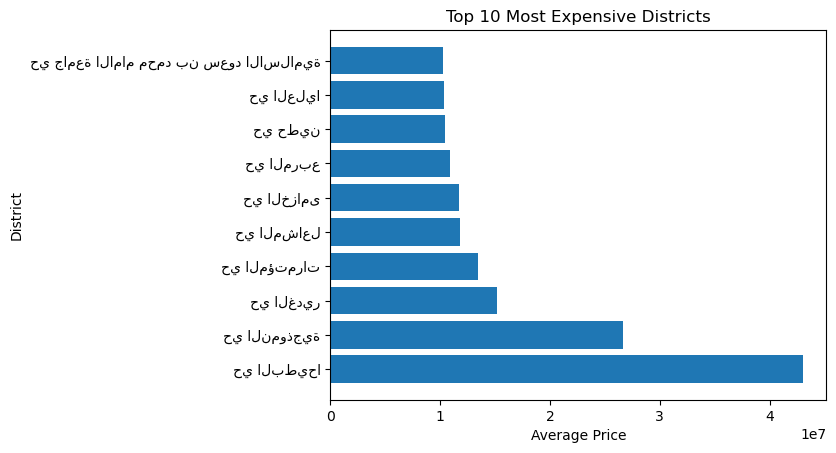

In [ ]:
top_n = 10
most_expensive = df.groupby('district')['price'].mean().sort_values(ascending=False).head(top_n)

plt.barh(most_expensive.index, most_expensive.values)  # Change from plt.bar to plt.barh
plt.ylabel('District')  # Update labels
plt.xlabel('Average Price')
plt.title(f'Top {top_n} Most Expensive Districts')
plt.show()

This visualization showcases the most expensive districts in your data set.

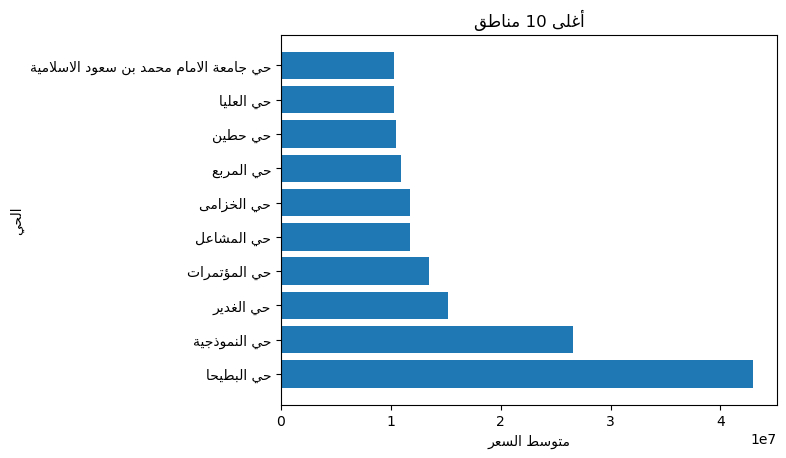

In [ ]:
def reshape_arabic(text):
  return get_display(arabic_reshaper.reshape(text))
most_expensive.index = most_expensive.index.map(reshape_arabic) # Apply to district labels

# 3. Set Arabic labels
plt.barh(most_expensive.index, most_expensive.values)
plt.ylabel(reshape_arabic(u'الحي'))
plt.xlabel(reshape_arabic(u'متوسط السعر'))
plt.title(reshape_arabic(f'أغلى {top_n} مناطق'))
plt.show()

Creates a scatter plot that represents the geographic distribution of properties within dataset (Riyadh Map)

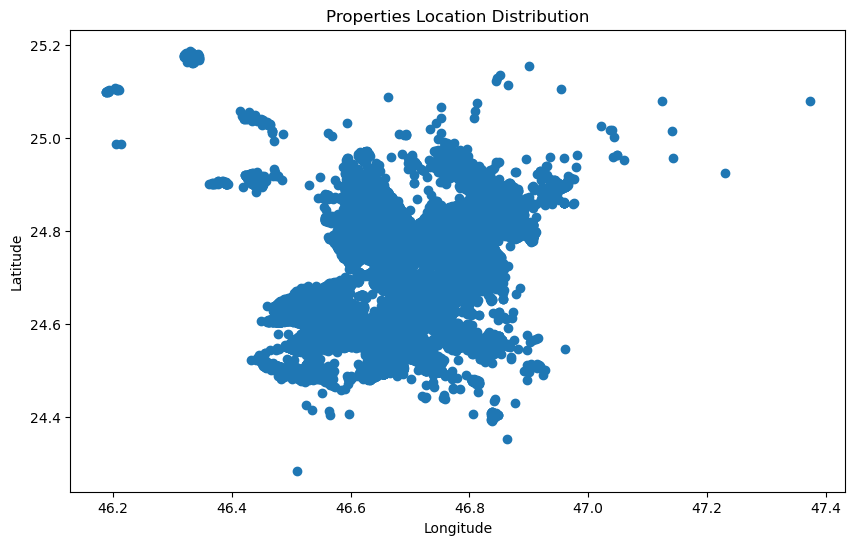

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
plt.scatter(df['location.lng'], df['location.lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Properties Location Distribution')
plt.show()

Enhances previous property location scatter plot, along with the kind of visual Color-Coding by Property Type>

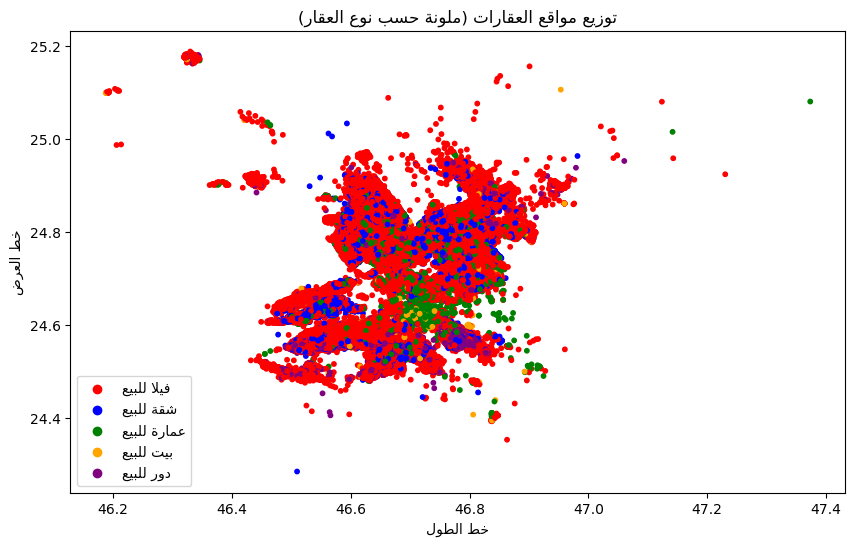

In [ ]:
# Create a dictionary to map AqarKinds to colors
def reshape_arabic(text):
  return get_display(arabic_reshaper.reshape(text))
color_dict = {
    'فيلا للبيع': 'red',
    'شقة للبيع': 'blue',
    'عمارة للبيع': 'green',
    'بيت للبيع': 'orange',
    'دور للبيع': 'purple'
}

colors = df['AqarKind'].map(color_dict)

# 4. Plotting with Arabic Labels
plt.figure(figsize=(10, 6))
plt.scatter(df['location.lng'], df['location.lat'], s=10, c=colors)
plt.xlabel(reshape_arabic(u'خط الطول'))  # Longitude
plt.ylabel(reshape_arabic(u'خط العرض'))  # Latitude
plt.title(reshape_arabic(u'توزيع مواقع العقارات (ملونة حسب نوع العقار)'))

# Create proxy artists, making sure labels are in Arabic
proxies = [plt.scatter([], [], color=v, label=reshape_arabic(k)) for k, v in color_dict.items()]
plt.legend(handles=proxies)

plt.show()


**4. Feature Engineering**

In [ ]:
A new column named 'price_per_sqm' is added (or updated if it already exists) in your DataFrame. Each value in this new column represents the price per square meter calculated by dividing the corresponding 'price' by the 'area' for that same row.

In [ ]:
df.loc[:, 'price_per_sqm'] = df['price'] / df['area']
# Get average price per square meter grouped by district
top_10_avg_price_sqm = df.groupby('district')['price_per_sqm'].mean().sort_values(ascending=False).head(10)

Each bar represents one of the top 10 districts you identified earlier based on average price per square meter. The height of each bar corresponds to this average value.

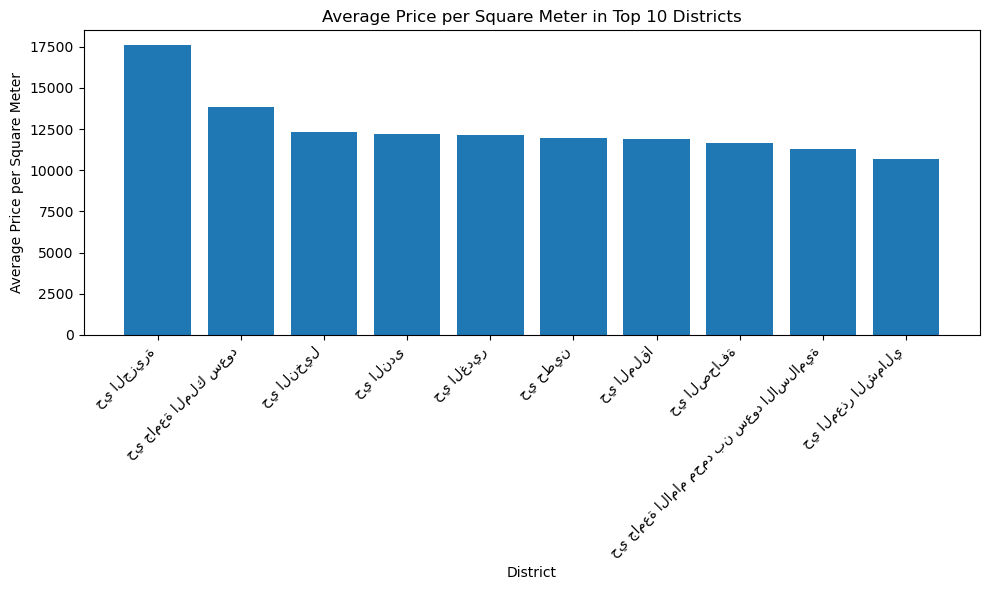

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(top_10_avg_price_sqm.index, top_10_avg_price_sqm.values)
plt.xlabel('District')
plt.ylabel('Average Price per Square Meter')
plt.title('Average Price per Square Meter in Top 10 Districts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Improve layout
plt.show()

In [ ]:
def calculate_price_per_area(df):
    df.loc[:, 'price_per_area'] = df['price'] / df['area']
    return df

df = calculate_price_per_area(df.copy())  # Use a copy to avoid potential warnings

The function returns the DataFrame with the newly added (or updated) 'price_per_area' column

In [ ]:
df

,AqarKind,price,category,beds,livings,Bathroom,area,street_width,age,street_direction,...,furnished,location.lat,location.lng,city,district,width,length,createdAt,price_per_sqm,price_per_area
7,عمارة للبيع,11000000,7,NaN,NaN,NaN,1050.0,60.0,7,6.0,...,0,24.819653,46.595070,الرياض,حي القيروان,30.0,35.0,1/1/2023 16:28,10476.190476,10476.190476
8,فيلا للبيع,5000000,3,5.0,2.0,5.0,394.0,15.0,10,1.0,...,0,24.800910,46.609243,الرياض,حي الملقا,13.0,30.0,1/1/2023 16:28,12690.355330,12690.355330
9,فيلا للبيع,1850000,3,6.0,2.0,5.0,330.0,20.0,0,2.0,...,0,24.669754,46.550041,الرياض,حي المهدية,12.0,27.0,1/1/2023 16:28,5606.060606,5606.060606
10,فيلا للبيع,2350000,3,4.0,3.0,4.0,225.0,20.0,0,3.0,...,0,24.857486,46.671509,الرياض,حي النرجس,1.0,225.0,1/1/2023 16:28,10444.444444,10444.444444
13,عمارة للبيع,6000000,7,NaN,NaN,NaN,867.0,36.0,30,3.0,...,0,24.746378,46.668077,الرياض,حي الملك فهد,25.0,35.0,1/1/2023 16:28,6920.415225,6920.415225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353598,فيلا للبيع,5800000,3,5.0,2.0,5.0,403.0,20.0,0,1.0,...,0,24.727747,46.602581,الرياض,حي النخيل,15.0,26.0,8/4/2023 21:04,14392.059553,14392.059553
353606,فيلا للبيع,7000000,3,6.0,2.0,5.0,700.0,15.0,17,4.0,...,0,24.787712,46.751518,الرياض,حي غرناطة,20.0,35.0,8/4/2023 21:04,10000.000000,10000.000000
353607,فيلا للبيع,2800000,3,7.0,2.0,5.0,400.0,20.0,10,1.0,...,1,24.636583,46.617821,الرياض,حي لبن,20.0,20.0,8/4/2023 21:04,7000.000000,7000.000000
353613,فيلا للبيع,650000,3,7.0,3.0,5.0,245.0,NaN,0,1.0,...,0,24.602110,46.712650,الرياض,حي اليمامة,9.0,27.0,8/4/2023 21:17,2653.061224,2653.061224


Calculates the price per square meter for each property and creates (or updates) a column named 'price_per_sqm' in DataFrame.Then identifies the top 10 districts with the highest median price per square meter and then extracts their corresponding median price per square meter values.


In [ ]:
df.loc[:, 'price_per_sqm'] = df['price'] / df['area']

# Find the top 10 districts with highest median price per square meter
top_10_districts = df.groupby('district')['price_per_sqm'].median().sort_values(ascending=False).head(10).index

# Get the median price per square meter values for the top 10 districts
median_price_sqm_top_10 = df.groupby('district')['price_per_sqm'].median().loc[top_10_districts]

print(median_price_sqm_top_10)

district
حي جامعة الملك سعود                       14503.205128
حي حطين                                   12000.000000
حي المعذر الشمالي                         11904.761905
حي جامعة الامام محمد بن سعود الاسلامية    11833.333333
حي النخيل                                 11694.915254
حي الملقا                                 11666.666667
حي الندى                                  11363.636364
حي الفلاح                                 11250.000000
حي الخزامى                                10400.000000
حي العقيق                                 10000.000000
Name: price_per_sqm, dtype: float64


The code generates a bar chart visualizing the top 10 districts based on median price per square meter.

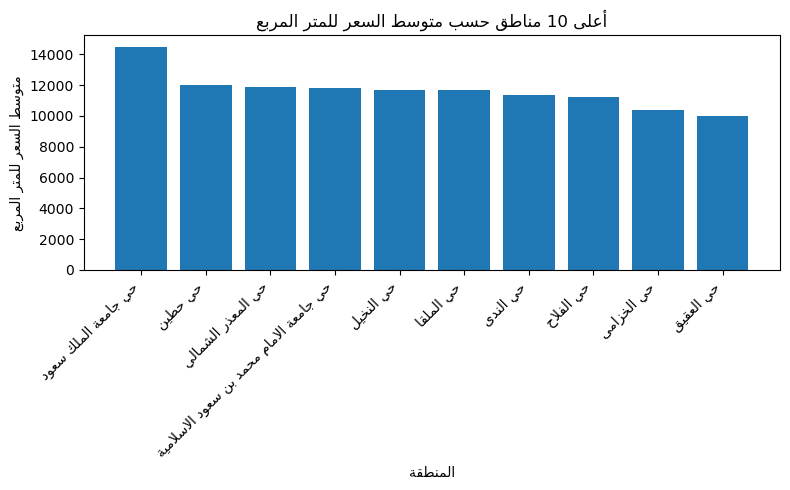

In [ ]:

top_10_districts = top_10_districts.map(reshape_arabic)  # Apply directly to the Index
median_price_sqm_top_10 = median_price_sqm_top_10.values

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_10_districts, median_price_sqm_top_10)

# Arabic labels
plt.xlabel(reshape_arabic(u'المنطقة'))
plt.ylabel(reshape_arabic(u'متوسط السعر للمتر المربع'))
plt.title(reshape_arabic(u'أعلى 10 مناطق حسب متوسط السعر للمتر المربع'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code snippet finds the 10 districts with the lowest median price per square meter and then extracts their corresponding median price per square meter values.Then creates a bar chart displaying the 10 districts with the lowest median price per square meter.

In [ ]:
bottom_10_districts = df.groupby('district')['price_per_sqm'].median().sort_values().head(10).index

# Get the median price per square meter values for the bottom 10 districts
median_price_sqm_bottom_10 = df.groupby('district')['price_per_sqm'].median().loc[bottom_10_districts]

print(median_price_sqm_bottom_10)

district
حي الدفاع       1666.666667
حي الغنامية     1952.380952
حي الاسكان      2000.000000
حي النور        2075.551660
حي الحائر       2259.036145
حي اليمامة      2334.429825
حي المصفاة      2335.628826
حي المنصورية    2443.455497
حي المناخ       2538.087707
حي البرية       2567.878788
Name: price_per_sqm, dtype: float64


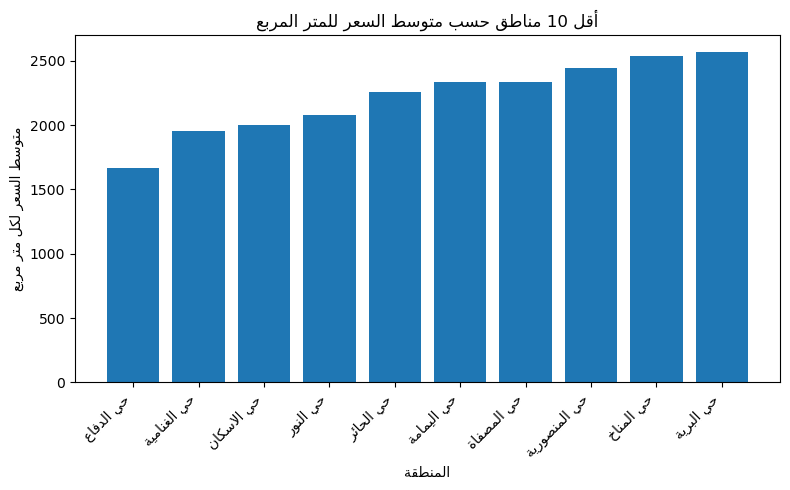

In [ ]:


median_price_sqm_bottom_10.index = median_price_sqm_bottom_10.index.map(reshape_arabic)

# 3. Create the Bar Chart with Arabic Labels
plt.figure(figsize=(8, 5))
plt.bar(median_price_sqm_bottom_10.index, median_price_sqm_bottom_10.values)
plt.xlabel(reshape_arabic(u'المنطقة'))
plt.ylabel(reshape_arabic(u'متوسط السعر لكل متر مربع'))
plt.title(reshape_arabic(u'أقل 10 مناطق حسب متوسط السعر للمتر المربع'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()